In [1]:
from Scripts import loading as dl
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt


def run(domain, trial, schema_rev_link, amazon_rev_link, schema_rev_size, amazon_rev_size):
    df = dl.load_merged_data(schema_rev_link, amazon_rev_link, schema_rev_size, amazon_rev_size)

    text = df.text_prep
    target = df.label

    seed = 7
    X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.25,random_state=seed, stratify=df.label)

    vect = TfidfVectorizer(binary=True, max_df=0.75, min_df=1, ngram_range=(1,2))
    train_vectorized = vect.fit_transform(X_train)
    vocab = vect.get_feature_names()
    print ("vocabulary size: ", len(vocab))
    test_vectorized = vect.transform(X_test)

    vectorizer_fs = SelectKBest(score_func=f_classif, k=500)
    fs_train_vectorized = vectorizer_fs.fit_transform(train_vectorized, y_train)
    fs_test_vectorized = vectorizer_fs.transform(test_vectorized)

    clf = SVC(C=1.0, decision_function_shape='ovo', gamma='auto', kernel='linear')
    clf.fit(fs_train_vectorized, y_train)

    y_pred = clf.predict(fs_test_vectorized)

    print(f"######## RESULT: {domain}_{trial}_{schema_rev_size}_{amazon_rev_size}")
    accuracy = str(metrics.accuracy_score(y_test , y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    recall = str(metrics.recall_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test , y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("Recall: " + recall)
    print("F1:" + f1)
    print(classification_report(y_test, y_pred, target_names=['class_1', 'class_2', 'class_3', 'class_4', 'class_5']))
    title = f"{domain}_{trial}_{schema_rev_size}_{amazon_rev_size}"
    disp = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.savefig(f'Results/test_series/{title}.png', dpi=200)

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.savefig(f'Results/test_series/{title_norm}.png', dpi=200)

    case_1 = 0
    case_2 = 0
    case_3 = 0
    case_4 = 0
    case_5 = 0
    case_6 = 0
    case_7 = 0
    case_8 = 0
    for (input_text, pred, label) in zip(X_test, y_pred, y_test):
        if pred == 3.0 and label in [1.0,2.0,4.0,5.0]:
            case_1 += 1
        if pred in [1.0,2.0,4.0,5.0] and label == 3.0:
            case_2 += 1
        if pred in [1.0,2.0] and label in [4.0,5.0]:
            case_3 += 1
        if pred in [4.0,5.0] and label in [1.0,2.0]:
            case_4 += 1
        if pred == 1.0 and label == 2.0:
            case_5 += 1
        if pred == 2.0 and label == 1.0:
            case_6 += 1
        if pred == 4.0 and label == 5.0:
            case_7 += 1
        if pred == 5.0 and label == 4.0:
            case_8 += 1
    print('')
    print('case_1','case_2','case_3','case_4','case_5','case_6','case_7','case_8')
    print(case_1, case_2, case_3, case_4, case_5, case_6, case_7, case_8)

    return f1

In [21]:
print('######### Versuchsreihe 1')
count_versuch = 1
limit= 1000
schema_size = 0
amazon_size = limit - schema_size
domains = ['phone', 'movie']
for d in domains:
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'

    print(f"{d}, test series {count_versuch}")
    while schema_size <= 1000: #run everything
        print(schema_link, amazon_link, schema_size, amazon_size)
        schema_size = schema_size + 250
        amazon_size = limit - schema_size
    limit = 1000
    schema_size = 0
    amazon_size = limit - schema_size


######### Versuchsreihe 1
phone, test series 1
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 0 1000
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 250 750
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 500 500
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 750 250
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1000 0
movie, test series 1
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 0 1000
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 250 750
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 500 500
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 750 250
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1000 0


In [23]:
print('######### Versuchsreihe 2')
count_versuch = 2
limit= 2000
schema_size = 1000
amazon_size = limit - schema_size
domains = ['phone', 'movie']
for d in domains:
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'
    print(f"{d}, test series {count_versuch}")
    while schema_size < 2000:
        print(schema_link, amazon_link, schema_size, amazon_size) #run everything
        schema_size = schema_size + 200
        amazon_size = limit - schema_size
    limit = 2000
    schema_size = 1000
    amazon_size = limit - schema_size

######### Versuchsreihe 2
phone, test series 2
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1000 1000
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1200 800
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1400 600
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1600 400
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1800 200
movie, test series 2
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1000 1000
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1200 800
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1400 600
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1600 400
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1800 200


In [27]:
print('######### Versuchsreihe 3')
count_versuch = 3
limit= 10000
schema_size = 0
amazon_size = limit - schema_size
domains = ['phone', 'movie']
for d in domains:
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'
    print(f"{d}, test series {count_versuch}")
    while schema_size <= 1000:
        print(schema_link, amazon_link, schema_size, amazon_size) #run everything
        schema_size = schema_size + 100
        amazon_size = limit - schema_size
    limit = 10000
    schema_size = 0
    amazon_size = limit - schema_size

######### Versuchsreihe 3
phone, test series 3
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 0 10000
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 100 9900
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 200 9800
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 300 9700
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 400 9600
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 500 9500
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 600 9400
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 700 9300
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 800 9200
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 900 9100
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1000 9000
movie, test series 3
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 0 10000
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 100 9900
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 200 9800
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 300 9700
../Data/schema_movie.pkl ../Data/amazon_movie.pk

######## phone, test series test
vocabulary size:  31499
######## RESULT: phone_test_0_200
Accuracy:0.34
Precision:0.33196095224397115
Recall: 0.34
F1:0.3068415784666535
              precision    recall  f1-score   support

     class_1       0.35      0.18      0.24        50
     class_2       0.12      0.02      0.03        50
     class_3       0.38      0.56      0.45        50
     class_4       0.25      0.54      0.35        50
     class_5       0.56      0.40      0.47        50

    accuracy                           0.34       250
   macro avg       0.33      0.34      0.31       250
weighted avg       0.33      0.34      0.31       250


case_1 case_2 case_3 case_4 case_5 case_6 case_7 case_8
46 22 7 47 10 4 22 7
vocabulary size:  33092
######## RESULT: phone_test_20_180
Accuracy:0.352
Precision:0.4919666838238735
Recall: 0.352
F1:0.3259748094300571
              precision    recall  f1-score   support

     class_1       0.53      0.46      0.49        50
     class_2   

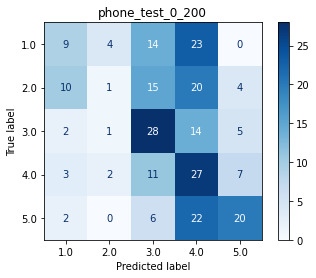

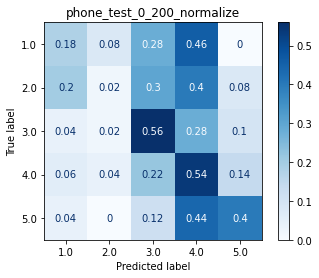

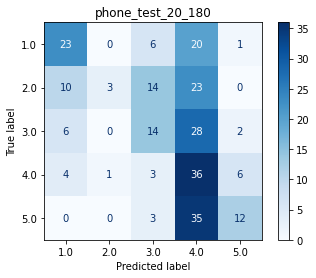

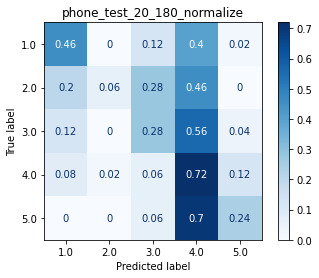

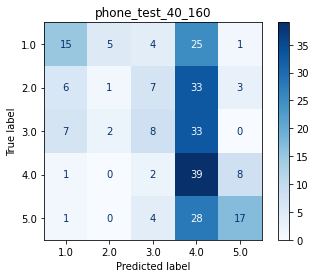

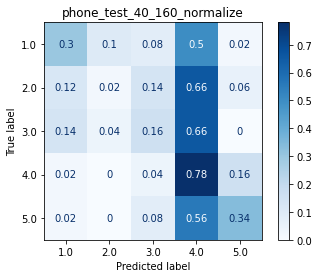

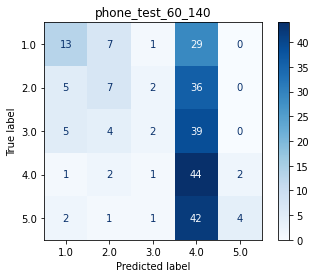

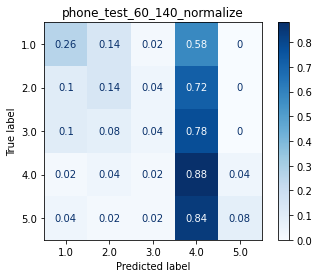

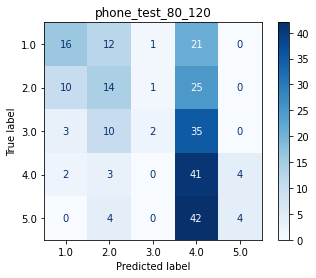

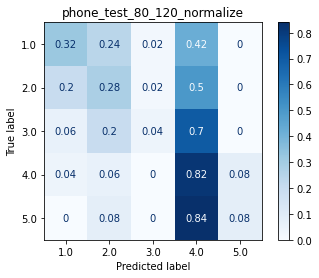

In [14]:
count_versuch = 'test'
limit= 200
schema_size = 0
amazon_size = limit - schema_size
# domains = ['phone', 'movie']
domains = ['phone']
for d in domains:
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'
    print(f"######## {d}, test series {count_versuch}")
    results = {}
    while schema_size < 100:

        result= run(d, count_versuch, schema_link, amazon_link, schema_size, amazon_size) #run everything
        results[f"{d}_{count_versuch}_{schema_size}_{amazon_size}"] = result

        schema_size = schema_size + 20
        amazon_size = limit - schema_size

    bigIndex = max([[results[key], key] for key in results])
    print(f'######## BEST RESULTS of trial{count_versuch}_{d}')
    print(bigIndex)

    limit = 200
    schema_size = 0
    amazon_size = limit - schema_size


In [15]:
print(results)

{'phone_test_0_200': '0.3068415784666535', 'phone_test_20_180': '0.3259748094300571', 'phone_test_40_160': '0.2856391677578932', 'phone_test_60_140': '0.22379752197394898', 'phone_test_80_120': '0.2582639351725114'}


In [ ]:
results= {}
f1 = 0.23543
domain = 'phone'
trial = 'test'
schema_rev_size = 10
amazon_rev_size = 10
results[f"{domain}_{trial}_{schema_rev_size}_{amazon_rev_size}"] = 0.23543
results[f"{domain}_{trial}_{schema_rev_size}_{amazon_rev_size}_1"] = 83946
results[f"{domain}_{trial}_{schema_rev_size}_{amazon_rev_size}_2"] = 5

bigIndex = max([[results[key], key] for key in results])
print(bigIndex)

In [10]:
versuchsreihe 4
schema_size = 1000
schema_size = amazon_size
while schema_size > 500



{}
